In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import joblib
import math
import numpy as np
import itertools 
from itertools import product
from collections import Counter
import garpar as gp
import re
import skcriteria as skc
from skcriteria import pipeline
from skcriteria.preprocessing import invert_objectives, weighters, scalers
from skcriteria.madm import similarity, moora, electre
from skcriteria.ranksrev import RankInvariantChecker

/home/nadia/indicador/lib/python3.10/site-packages/skcriteria/pipeline.py:27: SKCriteriaDeprecationWarning: The 'skcriteria.pipeline' module is deprecated since 0.9 and will be removed in 1.0 Use 'skcriteria.pipelines' instead.
  deprecate.warn(
/home/nadia/indicador/lib/python3.10/site-packages/skcriteria/madm.py:30: SKCriteriaDeprecationWarning: 'skcriteria.madm' module is deprecated, use 'skcriteria.agg' instead
  utils.deprecate.warn(deprecation_reason)
/home/nadia/indicador/lib/python3.10/site-packages/skcriteria/agg/similarity.py:27: SKCriteriaDeprecationWarning: The module 'skcriteria.agg.similarity' is deprecated since v0.9 and will be removed in v1.0. Please use 'skcriteria.agg.topsis' instead.
  deprecate.warn(


In [2]:
mer = joblib.load("./price_01-01-2010_to_01-10-2025.pklj")
mer= mer[3408:3808]
mer = mer.drop(columns=['BRIO', 'BRIO6','EDLH','EMDE','ESME','INAG','IRCP','PGR'])
mer = mer.ffill().apply(pd.to_numeric, errors='coerce')
mer = mer.infer_objects(copy=False)
pd.set_option('future.no_silent_downcasting', True)
mer

/tmp/ipykernel_6589/3642323531.py:4: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  mer = mer.ffill().apply(pd.to_numeric, errors='coerce')


,ALUA,BBAR,BMA,BYMA,CEPU,COME,CRES,CVH,EDN,GGAL,...,MORI,MTR,OEST,PATA,POLL,RICH,RIGO,SAMI,SEMI,TGLT
2023-12-11,1119.0,1875.70,2772.75,891.00,909.50,69.40,947.20,3383.0,926.55,1756.35,...,85.4,1151.0,789.5,766.0,89.0,768.0,803.5,891.5,95.90,16.70
2023-12-12,1115.5,1855.80,2713.80,943.00,976.70,70.35,1020.25,3541.5,1038.00,1780.85,...,87.5,1246.0,773.5,789.5,90.0,779.5,803.5,978.5,99.70,17.85
2023-12-13,1044.5,1888.65,2836.05,881.50,1004.30,70.65,1021.60,3575.5,1041.85,1827.30,...,87.1,1326.5,747.0,800.0,99.0,757.5,803.5,948.5,96.20,17.55
2023-12-14,1033.0,1859.10,2857.50,863.50,1026.35,69.95,1016.10,3488.5,1025.00,1788.85,...,85.8,1397.5,725.0,763.5,99.0,740.0,803.5,918.5,91.40,17.15
2023-12-15,923.0,1706.45,2696.75,825.50,926.00,67.50,964.65,3405.0,963.65,1652.50,...,81.7,1379.5,717.5,744.0,96.0,731.0,805.5,861.5,87.70,16.20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-07-25,715.0,6850.00,9190.00,193.50,1570.00,116.00,1465.00,6780.0,1715.00,6650.00,...,212.0,2475.0,684.0,1285.0,325.0,1370.0,640.0,630.0,24.95,19.20
2025-07-28,709.0,6820.00,9140.00,195.00,1590.00,126.00,1515.00,6900.0,1845.00,6620.00,...,232.0,2500.0,696.0,1290.0,325.0,1405.0,672.0,643.0,25.50,19.45
2025-07-29,723.0,7130.00,9450.00,201.00,1655.00,137.50,1555.00,7060.0,1930.00,6830.00,...,232.0,2550.0,704.0,1280.0,325.0,1500.0,678.0,650.0,25.85,20.30
2025-07-30,750.0,7190.00,9400.00,203.75,1650.00,134.75,1525.00,6930.0,1900.00,6850.00,...,228.5,2565.0,719.0,1275.0,325.0,1535.0,680.0,630.0,25.60,20.75


In [3]:
base19 = gp.StocksSet.from_prices(
        mer,
        weights=None,
        title="2025Merval19m",
        description=("Argentine stock market prices") )
base12 = gp.StocksSet.from_prices(
        mer[155:],
        weights=None,
        title="2025Merval12m",
        description=("Argentine stock market prices") )
base9 = gp.StocksSet.from_prices(
        mer[220:],
        weights=None,
        title="2025Merval9m",
        description=("Argentine stock market prices") )
base6 = gp.StocksSet.from_prices(
        mer[282:],
        weights=None,
        title="2025Merval6m",
        description=("Argentine stock market prices") )
base3 = gp.StocksSet.from_prices(
        mer[339:],
        weights=None,
        title="2025Merval3m",
        description=("Argentine stock market prices") )


In [4]:
ms = gp.optimize.mean_variance.MVOptimizer( model='max_sharpe')


In [5]:
# Diccionario de bases originales
bases = {
    "sharpe12": base12,
    "sharpe9":  base9,
    "sharpe6":  base6,
    "sharpe3":  base3,
}

# Lista para guardar resultados
rows = []

for name, base in bases.items():

    # Optimización + pruning
    mopt = ms.optimize(base).weights_prune()


    # Guardar en lista de diccionarios
    rows.append({
        "Base": name,
        "stocks_number": len(mopt.stocks),
        "Cross_Entropy": mopt.div.cross_entropy(),
       #"KeyZang_Entropy": mopt.div.ke_zang_entropy(),
        "Zheng_Entropy": mopt.div.zheng_entropy(),
        "Div_Ratio": mopt.div.ratio(),
        "CV_MC":(mopt.div.mrc() *  mopt.weights).std() / (mopt.div.mrc() *  mopt.weights).mean(),
        "PDI": mopt.div.pdi(n_components=3, random_state=100)
    })

# Crear el DataFrame final
df_metrics = pd.DataFrame(rows).set_index("Base")

df_metrics

/home/nadia/indicador/lib/python3.10/site-packages/garpar/optimize/mean_variance.py:259: UserWarning: No risk_free_rate specified, coercing it
  warnings.warn("No risk_free_rate specified, coercing it")
/home/nadia/indicador/lib/python3.10/site-packages/garpar/optimize/mean_variance.py:259: UserWarning: No risk_free_rate specified, coercing it
  warnings.warn("No risk_free_rate specified, coercing it")
/home/nadia/indicador/lib/python3.10/site-packages/garpar/optimize/mean_variance.py:259: UserWarning: No risk_free_rate specified, coercing it
  warnings.warn("No risk_free_rate specified, coercing it")
/home/nadia/indicador/lib/python3.10/site-packages/garpar/optimize/mean_variance.py:259: UserWarning: No risk_free_rate specified, coercing it
  warnings.warn("No risk_free_rate specified, coercing it")


,stocks_number,Cross_Entropy,Zheng_Entropy,Div_Ratio,CV_MC,PDI
Base,,,,,,
sharpe12,6,0.168606,1.659854,0.103180,0.885833,1.765518
sharpe9,5,0.528508,1.225192,0.097918,1.501351,1.849438
sharpe6,4,0.637969,0.987270,0.087601,1.505882,2.051352
sharpe3,6,0.828099,1.245818,0.100584,1.905195,1.773473


In [6]:
mk = gp.optimize.mean_variance.Markowitz(target_return=0.01)

In [7]:
# Diccionario de bases originales
basesm= {
 #   "marko19_stmean": base19,
    "marko12_stmean": base12,
    "marko9_stmean":  base9,
    "marko6_stmean":  base6,
    "marko3_stmean":  base3,
}

# Lista para guardar resultados
rows = []

for name, base in basesm.items():

    # Optimización + pruning
    mopt = mk.optimize(base).weights_prune()


    # Guardar en lista de diccionarios
    rows.append({
        "Base": name, 
        "stocks_number": len(mopt.stocks),
        "Cross_Entropy": mopt.div.cross_entropy(),
       # "KeyZang_Entropy": mopt.div.ke_zang_entropy(),
        "Zheng_Entropy": mopt.div.zheng_entropy(),
        "Div_Ratio": mopt.div.ratio(),
        "CV_MC":(mopt.div.mrc() *  mopt.weights).std() / (mopt.div.mrc() *  mopt.weights).mean(),
       "PDI": mopt.div.pdi(n_components=3, random_state=100)
    })

# Crear el DataFrame final
df_metricsm = pd.DataFrame(rows).set_index("Base")

df_metricsm

,stocks_number,Cross_Entropy,Zheng_Entropy,Div_Ratio,CV_MC,PDI
Base,,,,,,
marko12_stmean,17,0.856758,2.291960,0.146532,1.170692,0.596793
marko9_stmean,15,0.628264,2.192035,0.137942,1.153676,0.945500
marko6_stmean,10,0.499913,1.848682,0.135110,1.089012,1.529891
marko3_stmean,14,0.852440,2.084792,0.160220,1.181743,0.876415


In [8]:
mk2 = gp.optimize.mean_variance.Markowitz(target_risk=0.30)


In [9]:
# Diccionario de bases originales
basesm2= {
    "marko12_strisk": base12,
    "marko9_strisk":  base9,
    "marko6_strisk":  base6,
    "marko3_strisk":  base3,
}

# Lista para guardar resultados
rows = []

for name, base in basesm2.items():

    # Optimización + pruning
    mopt = mk2.optimize(base).weights_prune()


    # Guardar en lista de diccionarios
    rows.append({
        "Base": name,
        "stocks_number": len(mopt.stocks),
        "Cross_Entropy": mopt.div.cross_entropy(),
       # "KeyZang_Entropy": mopt.div.ke_zang_entropy(),
        "Zheng_Entropy": mopt.div.zheng_entropy(),
        "Div_Ratio": mopt.div.ratio(),
        "CV_MC":(mopt.div.mrc() *  mopt.weights).std() / (mopt.div.mrc() *  mopt.weights).mean(),
        "PDI": mopt.div.pdi(n_components=3, random_state=100)
    })

# Crear el DataFrame final
df_metricsm2 = pd.DataFrame(rows).set_index("Base")

df_metricsm2

,stocks_number,Cross_Entropy,Zheng_Entropy,Div_Ratio,CV_MC,PDI
Base,,,,,,
marko12_strisk,16,6.152253,2.066033,0.118584,1.277160,0.785620
marko9_strisk,7,5.081236,1.248225,0.101954,1.587318,1.731614
marko6_strisk,5,0.622320,1.178553,0.093109,1.630314,1.748393
marko3_strisk,6,0.982936,1.162590,0.096751,1.942268,1.773473


In [10]:
metrics= pd.concat([df_metrics,df_metricsm,df_metricsm2] , axis=0)
metrics

,stocks_number,Cross_Entropy,Zheng_Entropy,Div_Ratio,CV_MC,PDI
Base,,,,,,
sharpe12,6,0.168606,1.659854,0.103180,0.885833,1.765518
sharpe9,5,0.528508,1.225192,0.097918,1.501351,1.849438
sharpe6,4,0.637969,0.987270,0.087601,1.505882,2.051352
sharpe3,6,0.828099,1.245818,0.100584,1.905195,1.773473
marko12_stmean,17,0.856758,2.291960,0.146532,1.170692,0.596793
marko9_stmean,15,0.628264,2.192035,0.137942,1.153676,0.945500
marko6_stmean,10,0.499913,1.848682,0.135110,1.089012,1.529891
marko3_stmean,14,0.852440,2.084792,0.160220,1.181743,0.876415
marko12_strisk,16,6.152253,2.066033,0.118584,1.277160,0.785620


<Axes: >

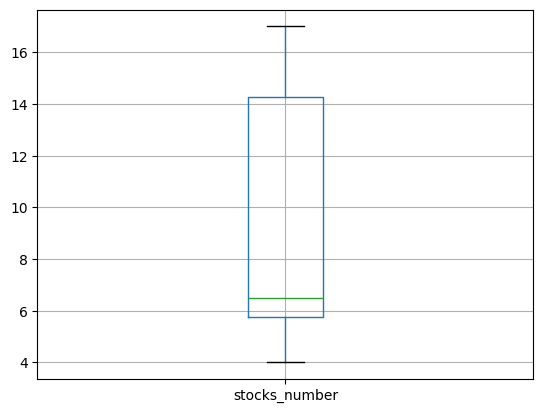

In [34]:
metrics[['stocks_number']].boxplot()

<Axes: >

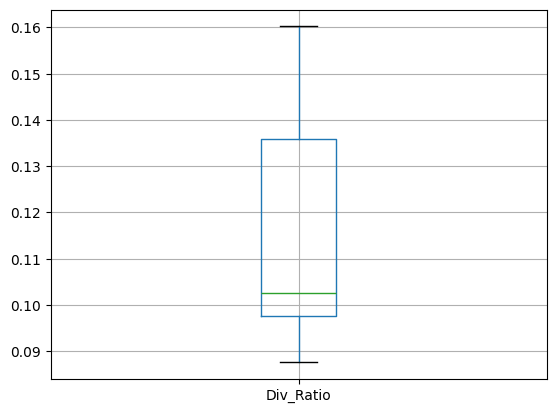

In [36]:
metrics[['Div_Ratio']].boxplot()

<Axes: >

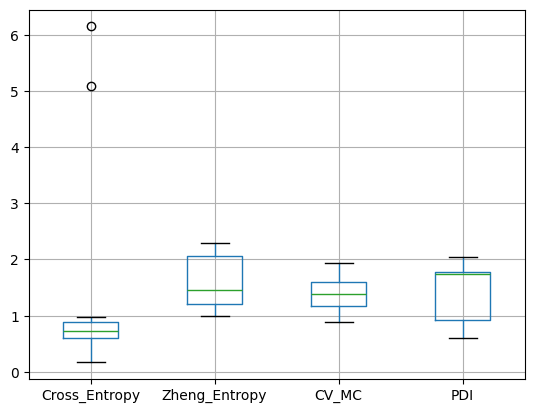

In [35]:
metrics[['Cross_Entropy', 'Zheng_Entropy', 'CV_MC',
       'PDI']].boxplot()

In [37]:
metrics.corr()

,stocks_number,Cross_Entropy,Zheng_Entropy,Div_Ratio,CV_MC,PDI
stocks_number,1.000000,0.286748,0.947654,0.862730,-0.531515,-0.987178
Cross_Entropy,0.286748,1.000000,0.100993,-0.049238,0.082845,-0.257815
Zheng_Entropy,0.947654,0.100993,1.000000,0.902951,-0.730104,-0.931728
Div_Ratio,0.862730,-0.049238,0.902951,1.000000,-0.604087,-0.853523
CV_MC,-0.531515,0.082845,-0.730104,-0.604087,1.000000,0.497828
PDI,-0.987178,-0.257815,-0.931728,-0.853523,0.497828,1.000000


In [23]:
describe_metrics = metrics.describe().transpose()
describe_metrics["kurt"]=metrics.kurt() 
describe_metrics["skew"]=metrics.skew() 
describe_metrics
#agragar maximo sobre el mínimo 

,count,mean,std,min,25%,50%,75%,max,kurt,skew
stocks_number,12.0,9.250000,4.882715,4.000000,5.750000,6.500000,14.250000,17.000000,-1.522029,0.616755
Cross_Entropy,12.0,1.486608,1.954212,0.168606,0.598867,0.733034,0.888303,6.152253,2.965971,2.062140
Zheng_Entropy,12.0,1.599250,0.474916,0.987270,1.213532,1.454040,2.070723,2.291960,-1.806247,0.250490
Div_Ratio,12.0,0.114957,0.024036,0.087601,0.097626,0.102567,0.135818,0.160220,-0.866591,0.753374
CV_MC,12.0,1.402537,0.329722,0.885833,1.166438,1.389255,1.598067,1.942268,-0.792840,0.289263
PDI,12.0,1.452290,0.500685,0.596793,0.928229,1.740003,1.773473,2.051352,-1.256322,-0.713319


In [12]:
objectives = [
    max, #     'stocks_seleccionados', coincide con definición mayor número de stocks
    min, #     'Entropia_cruzada', mide el desorden al compararlo con una estrategia teórica de risk part equally
    max, #     'Entropia_Zheng', 
    max, #     'Ratio_diversific', mide la diversificación ganada por  mantener activos no correlacionados
    min, #     'CV_Contribuciones_marginales', si todos los activos tienen igual contribución marginal es un portfolio diversificado
    max, #     'Indice_diversific_port, si hay correlacióan alta el índice dará un valor bajo mientras que si no hay correlación el índice tenderá al valor N
]
dm = skc.mkdm(metrics.to_numpy(), objectives, alternatives=metrics.index, criteria=metrics.columns)

In [13]:
#def preambulo(dm):
#    dm = invert_objectives.NegateMinimize().transform(dm)
#    dm = push_negatives.PushNegatives(target="matrix").transform(dm)
#    dm = increment.AddValueToZero(target="matrix", value=0.000001).transform(dm)
#    return dm
pipe_igual_minmax = pipeline.mkpipe(
    invert_objectives.NegateMinimize(),
    scalers.MinMaxScaler(target="matrix"),
    weighters.EqualWeighter(),
    similarity.TOPSIS(metric='chebyshev'),
)
pipe_igual_minmax
result_igual_minmax = pipe_igual_minmax.evaluate(dm)
result_igual_minmax

Alternatives,sharpe12,sharpe9,sharpe6,sharpe3,marko12_stmean,marko9_stmean,marko6_stmean,marko3_stmean,marko12_strisk,marko9_strisk,marko6_strisk,marko3_strisk
Rank,4,5,7,10,7,3,1,2,9,8,6,11


In [14]:
similarity.TOPSIS?

Init signature: similarity.TOPSIS(*, metric='euclidean')
Docstring:     
The Technique for Order of Preference by Similarity to Ideal Solution.

TOPSIS is based on the concept that the chosen alternative should have
the shortest geometric distance from the ideal solution and the longest
euclidean distance from the worst solution.

An assumption of TOPSIS is that the criteria are monotonically increasing
or decreasing, and also allow trade-offs between criteria, where a poor
result in one criterion can be negated by a good result in another
criterion.

Parameters
----------
metric : str or callable, optional
    The distance metric to use. If a string, the distance function
    can be ``braycurtis``, ``canberra``, ``chebyshev``, ``cityblock``,
    ``correlation``, ``cosine``, ``dice``, ``euclidean``, ``hamming``,
    ``jaccard``, ``jensenshannon``, ``kulsinski``, ``mahalanobis``,
    ``matching``, ``minkowski``, ``rogerstanimoto``, ``russellrao``,
    ``seuclidean``, ``sokalmichener``, 

In [15]:
dm_igual_minmax = pipe_igual_minmax.transform(dm)
dm_igual_minmax.weights


stocks_number    0.166667
Cross_Entropy    0.166667
Zheng_Entropy    0.166667
Div_Ratio        0.166667
CV_MC            0.166667
PDI              0.166667
Name: Weights, dtype: float64

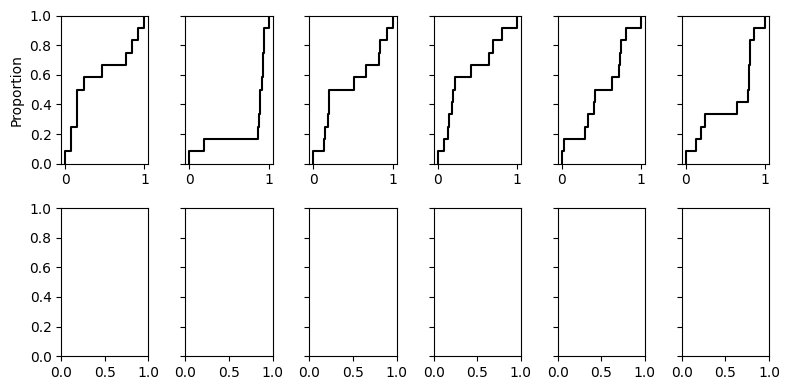

In [16]:
fig, axs = plt.subplots(2, 6, sharex=False, sharey=True)
fig.set_size_inches(8, 4)
axs = itertools.chain(*axs)
for crit, wt, ax  in zip(dm_igual_minmax.criteria[:], dm_igual_minmax.weights[:], axs):
    
    
    valc = dm_igual_minmax.criteria[crit]
    
    sns.ecdfplot(valc, ax=ax, color="k")
    
    ax.set_xlabel("")
    
#    title = translate.get(crit, crit)
#    title = title.replace("_", " ").capitalize()
#ax.set_title(f"{title} - W: {wt:.4f}")

fig.tight_layout()
plt.savefig("imgs/ogive_full.pdf", bbox_inches='tight')

In [17]:
pipe_igual_vector = pipeline.mkpipe(
    invert_objectives.NegateMinimize(),
    scalers.VectorScaler(target="matrix"),
    weighters.EqualWeighter(),
    similarity.TOPSIS(),
)
pipe_igual_vector
result_igual_vector = pipe_igual_vector.evaluate(dm)
result_igual_vector


Alternatives,sharpe12,sharpe9,sharpe6,sharpe3,marko12_stmean,marko9_stmean,marko6_stmean,marko3_stmean,marko12_strisk,marko9_strisk,marko6_strisk,marko3_strisk
Rank,5,6,9,8,4,1,2,3,11,12,7,10


In [18]:
dm_igual_vector = pipe_igual_vector.transform(dm)
dm_igual_vector.weights

stocks_number    0.166667
Cross_Entropy    0.166667
Zheng_Entropy    0.166667
Div_Ratio        0.166667
CV_MC            0.166667
PDI              0.166667
Name: Weights, dtype: float64

vmin=-0.7432, vmax=1.0000, center=0.2160


/home/nadia/indicador/lib/python3.10/site-packages/pandas/io/formats/format.py:1354: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  for val, m in zip(values.ravel(), mask.ravel())
/home/nadia/indicador/lib/python3.10/site-packages/pandas/io/formats/format.py:1354: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  for val, m in zip(values.ravel(), mask.ravel())


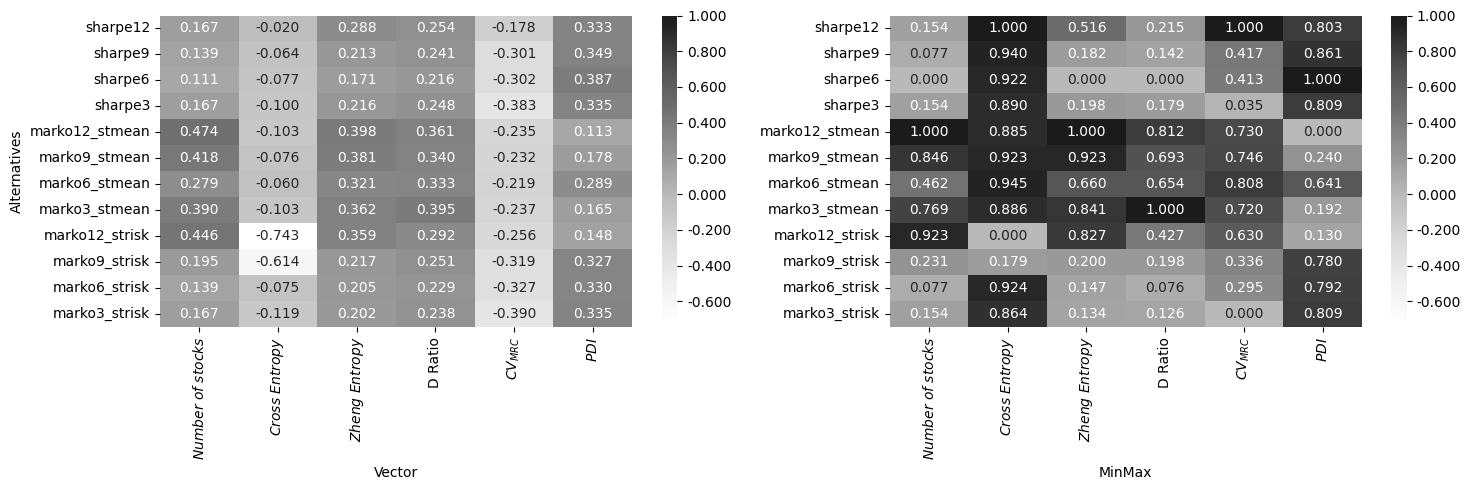

In [19]:
trans = [
     "$Number$ $of$ $stocks$",
     "$Cross$ $Entropy$",
    "$Zheng$ $Entropy$",
      "D Ratio",
    "$CV_{MRC}$",
     "$PDI$",
]

fig, axs = plt.subplots(
    1, 2, figsize=(15,5),sharex=True)

all_values = np.concatenate((dm_igual_vector.matrix.to_numpy().flatten(), dm_igual_minmax.matrix.to_numpy().flatten(),
                             dm_igual_vector.weights.to_numpy(), dm_igual_minmax.weights.to_numpy()))
vmin, vmax, center = all_values.min(), all_values.max(), np.quantile(all_values, .5)


print(f"{vmin=:.4f}, {vmax=:.4f}, {center=:.4f}")

del all_values

dm_igual_vector.plot.heatmap(ax=axs[0], cmap="Greys", vmin=vmin, vmax=vmax, center=center, fmt=".3f", cbar_kws={"format":"%.3f"})
dm_igual_minmax.plot.heatmap(ax=axs[1], cmap="Greys", vmin=vmin, vmax=vmax, center=center, fmt=".3f", cbar_kws={"format":"%.3f"})

axs[0].set_xlabel("Vector")
axs[1].set_xlabel("MinMax")
axs[1].set_ylabel("")
axs[1].set_ylabel("")

axs[0].set_xticklabels(trans)
axs[1].set_xticklabels(trans)

fig.tight_layout()
plt.savefig("imgs/mapanormalminmax.pdf",bbox_inches='tight');
#La escala de intervalo el mínimo se eleva al cuadrado   mete razón 

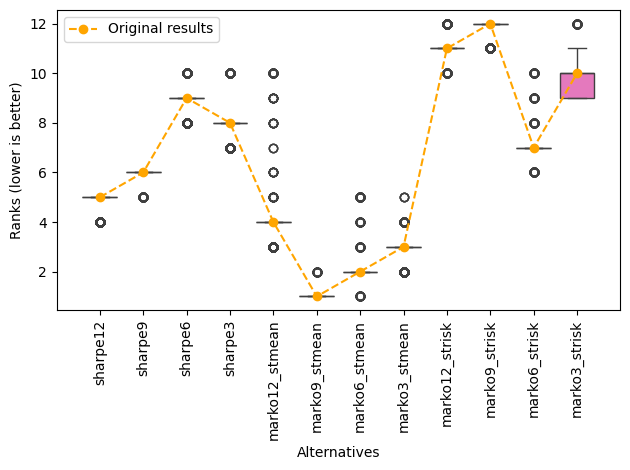

In [20]:
# Create the stability evaluator
rrt1 = RankInvariantChecker(
    dmaker=pipe_igual_vector, #cambiar aqui el pipeseleccionado para rank reversal
    repeat=120,
    allow_missing_alternatives=True
)

# Execute the RRT1 test
comparison = rrt1.evaluate(dm)
ax = comparison.plot()
ax.plot(
    result_igual_vector, #cambiar aquí el dm original 
    marker="o",
    linestyle="--",
    color="orange",
    label="Original results",
    zorder=3,
)
# LÍNEA DE CÓDIGO AÑADIDA PARA ROTAR LAS ETIQUETAS
ax.tick_params(axis='x', rotation=90)
ax.legend()
plt.tight_layout();
plt.savefig("imgs/rr1vector.pdf",bbox_inches='tight');

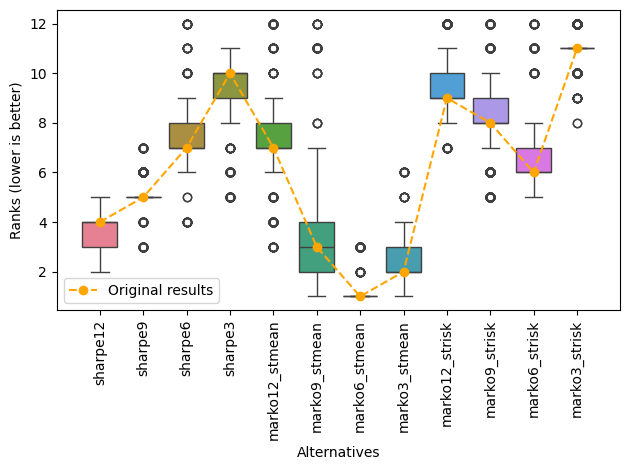

In [21]:
# Create the stability evaluator
rrt1 = RankInvariantChecker(
    dmaker=pipe_igual_minmax, #cambiar aqui el pipeseleccionado para rank reversal
    repeat=120,
    allow_missing_alternatives=True
)

# Execute the RRT1 test
comparison = rrt1.evaluate(dm)
ax = comparison.plot()
ax.plot(
    result_igual_minmax, #cambiar aquí el dm original 
    marker="o",
    linestyle="--",
    color="orange",
    label="Original results",
    zorder=3,
)
# LÍNEA DE CÓDIGO AÑADIDA PARA ROTAR LAS ETIQUETAS
ax.tick_params(axis='x', rotation=90)
ax.legend()
plt.tight_layout();
plt.savefig("imgs/rr1minmax.pdf",bbox_inches='tight');